In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [5]:
df = pd.read_csv('titanic.csv', sep=',', quotechar='"')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df['Fare'] = df['Fare'].fillna(df['Fare'].median())
df['Has_Cabin'] = df['Cabin'].notnull().astype(int)

In [7]:
label = LabelEncoder()
df['Sex'] = label.fit_transform(df['Sex'])        # male=1, female=0
df['Embarked'] = label.fit_transform(df['Embarked'])

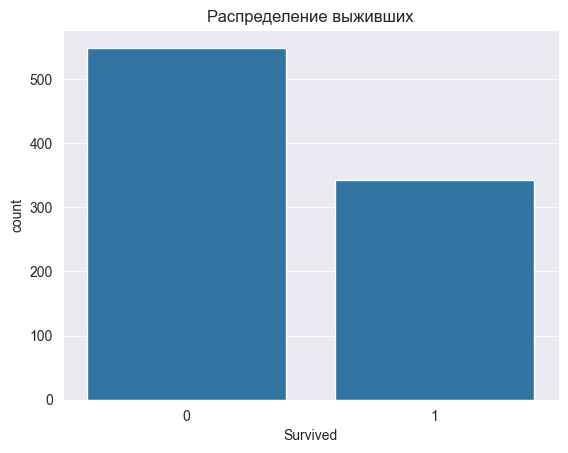

In [8]:
sns.countplot(x='Survived', data=df)
plt.title('Распределение выживших')
plt.show()

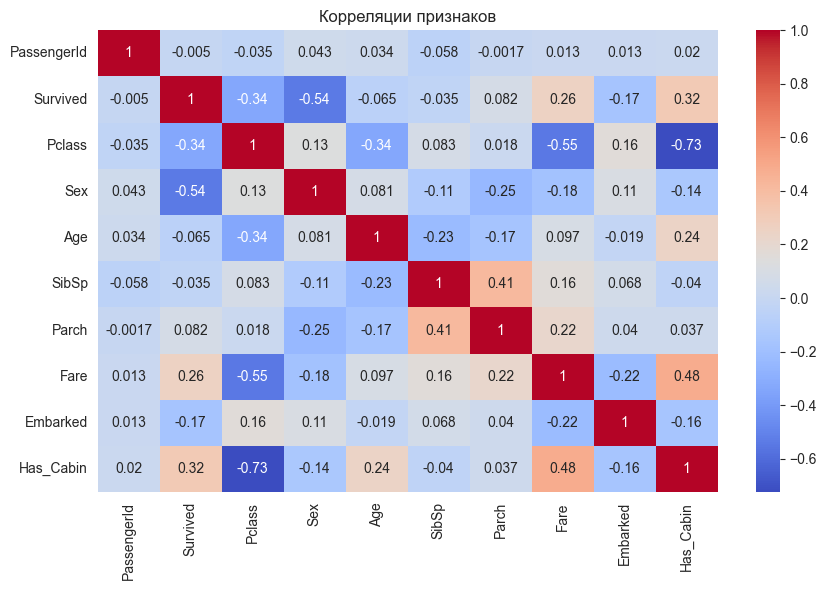

In [9]:
numeric_cols = df.select_dtypes(include=[np.number])

plt.figure(figsize=(10, 6))
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm')
plt.title('Корреляции признаков')
plt.show()

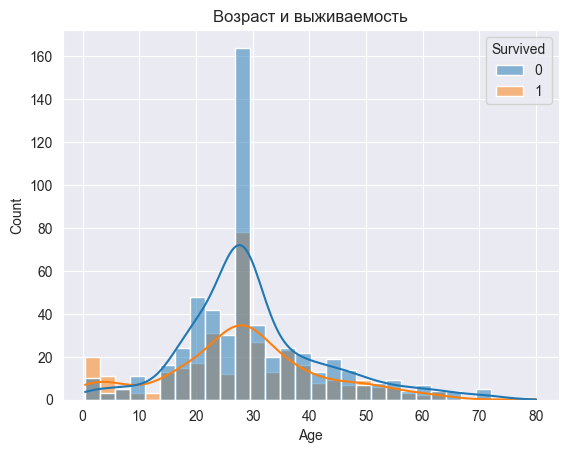

In [10]:
sns.histplot(data=df, x='Age', hue='Survived', kde=True)
plt.title('Возраст и выживаемость')
plt.show()

In [11]:
df['Family'] = df['SibSp'] + df['Parch']
df['Alone'] = (df['Family'] == 0).astype(int)

In [12]:
df[['Family', 'Alone', 'Survived', 'Has_Cabin']].corr()

,Family,Alone,Survived,Has_Cabin
Family,1.000000,-0.690922,0.016639,-0.009175
Alone,-0.690922,1.000000,-0.203367,-0.158029
Survived,0.016639,-0.203367,1.000000,0.316912
Has_Cabin,-0.009175,-0.158029,0.316912,1.000000


In [13]:
X = df[['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'Alone', 'Has_Cabin']]
y = df['Survived']

model = RandomForestClassifier(random_state=42)
model.fit(X, y)

RandomForestClassifier(random_state=42)

In [14]:
scores = cross_val_score(model, X, y, cv=5)
print(f'Кросс-валидация (5 фолдов): {scores}')
print(f'Средняя точность: {scores.mean():.3f}')

Кросс-валидация (5 фолдов): [0.77094972 0.76966292 0.84831461 0.76966292 0.83707865]
Средняя точность: 0.799


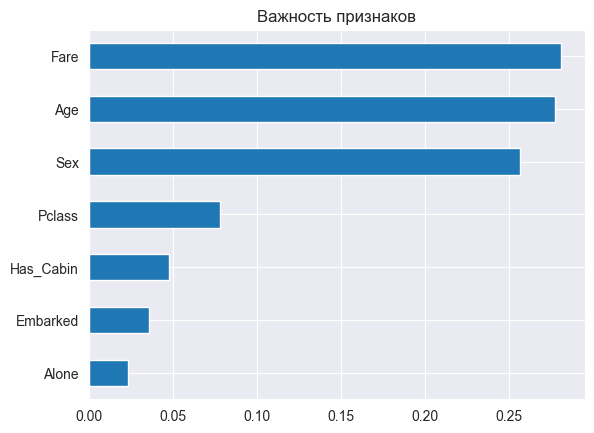

In [15]:
feat_imp = pd.Series(model.feature_importances_, index=X.columns)
feat_imp.sort_values().plot(kind='barh')
plt.title('Важность признаков')
plt.show()